In [7]:
import sys
sys.path.insert(0, '..')

import asyncio
import json
import collections
import math

%matplotlib notebook
import numpy as nps
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['figure.dpi'] = 70 # 200 e.g. is really fine, but slower

from jupyterplot import ProgressPlot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

from pandas_connector import connector

In [8]:
ip = "127.0.0.1"
port = 9090

connector.setup(ip=ip, port=port)

In [9]:
task = connector.connect(200)

In [10]:
connector.dataframe.tail(5)

,eyeGazeHeadGaze.fixation,eyeGazeHeadGaze.selection,eyeGazeHeadGaze.distance.x_acceleration.means,eyeGazeHeadGaze.cartesian.acceleration,eyeGazeHeadGaze.cartesian.acceleration.x,eyeGazeHeadGaze.cartesian.acceleration.y
93,0.0,False,0.0,"(0.0, 0.0)",0.0,0.0
94,0.0,False,0.0,"(0.0, 0.0)",0.0,0.0
95,0.0,False,0.0,"(0.0, 0.0)",0.0,0.0
96,0.0,False,0.0,"(815.0, 53.5)",815.0,53.5
97,0.0,False,0.0,"(729.5, 58.7)",729.5,58.7


In [11]:
selection_fixation = float(connector.constants["selectionFixation"].replace(',', '.'))
selection_tolerance = float(connector.constants["selectionTolerance"].replace(',', '.'))
selection_target_acceleration = float(connector.constants["selectionTargetAcceleration"].replace(',', '.'))

<IPython.core.display.Javascript object>


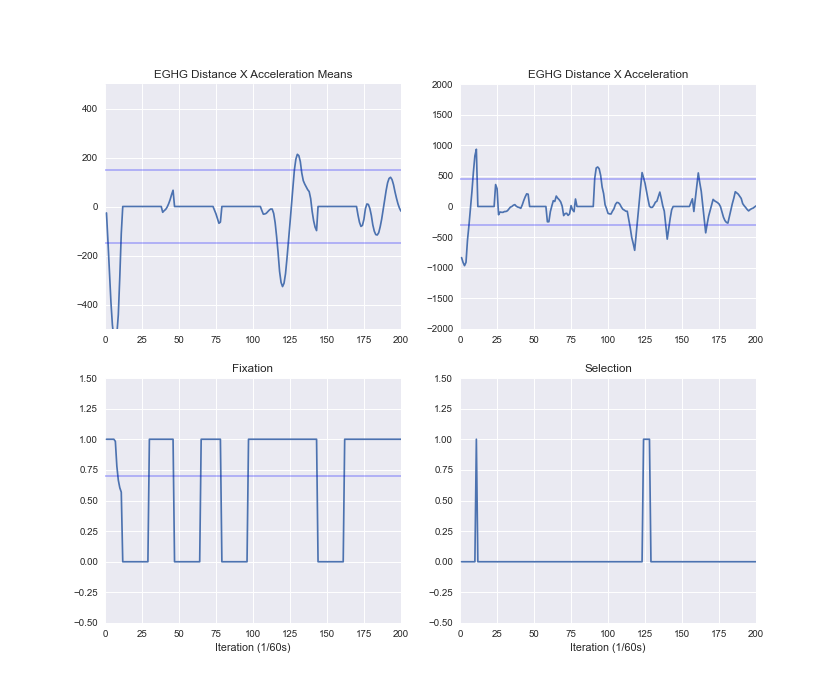

In [12]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

line1, = ax[0][0].plot([], [], linestyle='-')
ax[0][0].axhline(selection_tolerance, color='blue', lw=2, alpha=0.25)
ax[0][0].axhline(-selection_tolerance, color='blue', lw=2, alpha=0.25)

line2, = ax[0][1].plot([], [], label="X Acceleration", linestyle='-')
ax[0][1].axhline(selection_target_acceleration - selection_tolerance, color='blue', lw=2, alpha=0.25)
ax[0][1].axhline(-selection_target_acceleration + selection_tolerance*2, color='blue', lw=2, alpha=0.25)

line3, = ax[1][0].plot([], [], label="Fixation", linestyle='-')
ax[1][0].axhline(selection_fixation, color='blue', lw=2, alpha=0.25)

line4, = ax[1][1].plot([], [], label="Selection", linestyle='-')

ax[0][0].set_title("EGHG Distance X Acceleration Means")
ax[0][1].set_title("EGHG Distance X Acceleration")
ax[1][0].set_title("Fixation")
ax[1][1].set_title("Selection")


def init():
    line1.set_data([], [])
    #line2.set_data([], [])
    line3.set_data([], [])
    #line4.set_data([], [])
    
    ax[0][0].set_xlim(0, 200)
    ax[0][0].set_ylim(-500, 500)
    ax[0][1].set_xlim(0, 200)
    ax[0][1].set_ylim(-2000, 2000)    
    ax[1][0].set_xlim(0, 200)
    ax[1][0].set_ylim(-0.5, 1.5)
    ax[1][1].set_xlim(0, 200)
    ax[1][1].set_ylim(-0.5, 1.5)

    ax[1][0].set_xlabel("Iteration (1/60s)")
    ax[1][1].set_xlabel("Iteration (1/60s)")


def update(frame):
    try:
        line1.set_data(connector.dataframe.index, connector.dataframe["eyeGazeHeadGaze.distance.x_acceleration.means"])
        line2.set_data(connector.dataframe.index, connector.dataframe["eyeGazeHeadGaze.cartesian.acceleration.x"])
        line3.set_data(connector.dataframe.index, connector.dataframe["eyeGazeHeadGaze.fixation"])
        line4.set_data(connector.dataframe.index, connector.dataframe["eyeGazeHeadGaze.selection"].astype(int))
        return line1, line2, line3, line4,
    except:
        pass


animation = FuncAnimation(fig, update, init_func=init, interval=200, blit=True)
plt.show()

In [28]:
connector.disconnect(task)

In [11]:
connector.dataframe["eyeGazeHeadGaze.selection"].str.astype(int)

AttributeError: 'StringMethods' object has no attribute 'astype'